In [1]:
from river.datasets.synth import FriedmanDrift
from river.preprocessing import MinMaxScaler
from river.metrics import MAE
from river.utils import Rolling
from river.tree import HoeffdingTreeRegressor
from deep_river.regression import Regressor
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

In [2]:
n_samples = 12500
change_points = (5000, 7500)
friedman = FriedmanDrift(drift_type="gra", position=change_points)


def test_train_eval(model, stream, update_interval=100):
    results = []
    steps = []
    step = 0
    metric = Rolling(MAE(), window_size=400)
    scaler = MinMaxScaler()
    for x, y in tqdm(list(stream)):
        scaler.learn_one(x)
        x = scaler.transform_one(x)
        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        metric.update(y, y_pred)
        step += 1
        if step % update_interval == 0:
            results.append(metric.get())
            steps.append(step)
    return steps, results

In [3]:
class SimpleMLP(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.hidden = nn.Linear(n_features, 20)
        self.logit = nn.Linear(20, 1)

    def forward(self, x):
        h = self.hidden(x)
        h = torch.relu(h)
        return self.logit(h)


mlp = Regressor(
    SimpleMLP(10),
    loss_fn="l1",
    optimizer_fn="adam",
    lr=0.005,
    seed=42,
)
steps, results_mlp = test_train_eval(mlp, friedman.take(n_samples))

  0%|                                                                                                                                                                                                                                                                                             | 0/12500 [00:00<?, ?it/s]

  1%|█▍                                                                                                                                                                                                                                                                                 | 66/12500 [00:00<00:18, 659.97it/s]

  2%|████▍                                                                                                                                                                                                                                                                            | 205/12500 [00:00<00:11, 1086.71it/s]

  3%|███████▌                                                                                                                                                                                                                                                                         | 346/12500 [00:00<00:09, 1232.04it/s]

  4%|██████████▌                                                                                                                                                                                                                                                                      | 485/12500 [00:00<00:09, 1293.10it/s]

  5%|█████████████▊                                                                                                                                                                                                                                                                   | 630/12500 [00:00<00:08, 1347.46it/s]

  6%|████████████████▉                                                                                                                                                                                                                                                                | 773/12500 [00:00<00:08, 1372.12it/s]

  7%|████████████████████                                                                                                                                                                                                                                                             | 918/12500 [00:00<00:08, 1396.86it/s]

  8%|███████████████████████                                                                                                                                                                                                                                                         | 1062/12500 [00:00<00:08, 1410.36it/s]

 10%|██████████████████████████▏                                                                                                                                                                                                                                                     | 1204/12500 [00:00<00:08, 1409.68it/s]

 11%|█████████████████████████████▎                                                                                                                                                                                                                                                  | 1348/12500 [00:01<00:07, 1418.42it/s]

 12%|████████████████████████████████▍                                                                                                                                                                                                                                               | 1490/12500 [00:01<00:07, 1401.28it/s]

 13%|███████████████████████████████████▍                                                                                                                                                                                                                                            | 1631/12500 [00:01<00:07, 1399.53it/s]

 14%|██████████████████████████████████████▌                                                                                                                                                                                                                                         | 1774/12500 [00:01<00:07, 1406.71it/s]

 15%|█████████████████████████████████████████▋                                                                                                                                                                                                                                      | 1915/12500 [00:01<00:07, 1400.51it/s]

 16%|████████████████████████████████████████████▊                                                                                                                                                                                                                                   | 2058/12500 [00:01<00:07, 1407.15it/s]

 18%|███████████████████████████████████████████████▊                                                                                                                                                                                                                                | 2199/12500 [00:01<00:07, 1403.78it/s]

 19%|██████████████████████████████████████████████████▉                                                                                                                                                                                                                             | 2340/12500 [00:01<00:07, 1403.49it/s]

 20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                          | 2481/12500 [00:01<00:07, 1401.76it/s]

 21%|█████████████████████████████████████████████████████████                                                                                                                                                                                                                       | 2625/12500 [00:01<00:06, 1412.09it/s]

 22%|████████████████████████████████████████████████████████████▏                                                                                                                                                                                                                   | 2767/12500 [00:02<00:06, 1411.19it/s]

 23%|███████████████████████████████████████████████████████████████▎                                                                                                                                                                                                                | 2909/12500 [00:02<00:06, 1411.33it/s]

 24%|██████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                             | 3051/12500 [00:02<00:06, 1411.86it/s]

 26%|█████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                          | 3196/12500 [00:02<00:06, 1422.43it/s]

 27%|████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                       | 3339/12500 [00:02<00:06, 1411.65it/s]

 28%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                    | 3487/12500 [00:02<00:06, 1429.78it/s]

 29%|███████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                 | 3631/12500 [00:02<00:06, 1424.97it/s]

 30%|██████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                              | 3774/12500 [00:02<00:06, 1416.45it/s]

 31%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                          | 3916/12500 [00:02<00:06, 1412.60it/s]

 32%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                       | 4058/12500 [00:02<00:05, 1408.37it/s]

 34%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                    | 4200/12500 [00:03<00:05, 1411.47it/s]

 35%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                 | 4342/12500 [00:03<00:05, 1399.16it/s]

 36%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                              | 4483/12500 [00:03<00:05, 1402.27it/s]

 37%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                           | 4624/12500 [00:03<00:05, 1403.36it/s]

 38%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                        | 4765/12500 [00:03<00:05, 1403.40it/s]

 39%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                     | 4906/12500 [00:03<00:05, 1395.73it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                  | 5046/12500 [00:03<00:05, 1395.60it/s]

 42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                               | 5189/12500 [00:03<00:05, 1403.23it/s]

 43%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                            | 5331/12500 [00:03<00:05, 1406.74it/s]

 44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                        | 5476/12500 [00:03<00:04, 1418.81it/s]

 45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                     | 5622/12500 [00:04<00:04, 1428.32it/s]

 46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                  | 5765/12500 [00:04<00:04, 1427.56it/s]

 47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                               | 5908/12500 [00:04<00:04, 1425.27it/s]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                            | 6051/12500 [00:04<00:04, 1419.51it/s]

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 6193/12500 [00:04<00:04, 1405.84it/s]

 51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                      | 6334/12500 [00:04<00:04, 1403.59it/s]

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 6478/12500 [00:04<00:04, 1411.29it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                | 6620/12500 [00:04<00:04, 1400.18it/s]

 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                            | 6762/12500 [00:04<00:04, 1404.76it/s]

 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 6904/12500 [00:04<00:03, 1408.23it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                      | 7045/12500 [00:05<00:03, 1403.69it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                   | 7186/12500 [00:05<00:03, 1380.90it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 7325/12500 [00:05<00:03, 1368.55it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                             | 7462/12500 [00:05<00:03, 1366.96it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                          | 7603/12500 [00:05<00:03, 1376.62it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 7741/12500 [00:05<00:03, 1375.89it/s]

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                    | 7879/12500 [00:05<00:03, 1376.27it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                 | 8019/12500 [00:05<00:03, 1383.33it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 8161/12500 [00:05<00:03, 1392.31it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 8304/12500 [00:05<00:02, 1401.96it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 8446/12500 [00:06<00:02, 1404.95it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 8589/12500 [00:06<00:02, 1409.28it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 8730/12500 [00:06<00:02, 1408.50it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 8872/12500 [00:06<00:02, 1408.48it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 9016/12500 [00:06<00:02, 1415.91it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 9158/12500 [00:06<00:02, 1408.82it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 9299/12500 [00:06<00:02, 1405.51it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 9440/12500 [00:06<00:02, 1402.88it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 9583/12500 [00:06<00:02, 1408.41it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 9724/12500 [00:06<00:01, 1405.51it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 9865/12500 [00:07<00:01, 1402.89it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 10006/12500 [00:07<00:01, 1392.30it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 10148/12500 [00:07<00:01, 1400.10it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 10291/12500 [00:07<00:01, 1408.55it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 10433/12500 [00:07<00:01, 1409.99it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 10575/12500 [00:07<00:01, 1406.51it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 10716/12500 [00:07<00:01, 1403.10it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 10858/12500 [00:07<00:01, 1405.25it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 11001/12500 [00:07<00:01, 1411.39it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 11144/12500 [00:07<00:00, 1415.28it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 11286/12500 [00:08<00:00, 1414.91it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 11430/12500 [00:08<00:00, 1419.34it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 11572/12500 [00:08<00:00, 1411.97it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 11715/12500 [00:08<00:00, 1414.61it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 11857/12500 [00:08<00:00, 1411.37it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 11999/12500 [00:08<00:00, 1408.05it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 12140/12500 [00:08<00:00, 1402.14it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 12282/12500 [00:08<00:00, 1404.86it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 12427/12500 [00:08<00:00, 1416.52it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:08<00:00, 1398.79it/s]

In [4]:
tree = HoeffdingTreeRegressor()
steps, results_tree = test_train_eval(tree, friedman.take(n_samples))

  0%|                                                                                                                                                                                                                                                                                             | 0/12500 [00:00<?, ?it/s]

  7%|██████████████████▉                                                                                                                                                                                                                                                              | 865/12500 [00:00<00:01, 8648.28it/s]

 14%|█████████████████████████████████████▋                                                                                                                                                                                                                                          | 1730/12500 [00:00<00:01, 8607.06it/s]

 22%|███████████████████████████████████████████████████████████                                                                                                                                                                                                                     | 2714/12500 [00:00<00:01, 9095.22it/s]

 29%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                | 3646/12500 [00:00<00:00, 9180.87it/s]

 37%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                            | 4564/12500 [00:00<00:00, 8994.64it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                      | 5576/12500 [00:00<00:00, 9368.64it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                  | 6514/12500 [00:00<00:00, 8912.22it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                              | 7410/12500 [00:00<00:00, 8922.66it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 8306/12500 [00:00<00:00, 8751.77it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 9184/12500 [00:01<00:00, 6431.24it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 9950/12500 [00:01<00:00, 6723.12it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 10723/12500 [00:01<00:00, 6978.26it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 11718/12500 [00:01<00:00, 7767.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:01<00:00, 8063.74it/s]

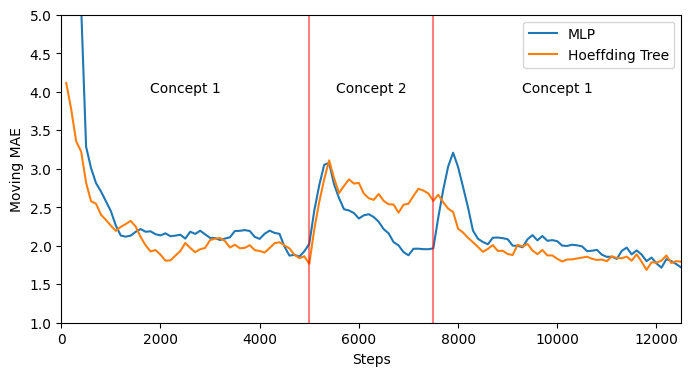

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(steps, results_mlp, label="MLP")
ax.plot(steps, results_tree, label="Hoeffding Tree")
for change_point in change_points:
    ax.axvline(change_point, color="red", alpha=0.5)
ax.set_xlim(0, n_samples)
ax.set_ylim(1, 5)
plt.text(
    int(change_points[0] / 2), 4, "Concept 1", horizontalalignment="center"
)
plt.text(
    int(change_points[0] + (change_points[1] - change_points[0]) / 2),
    4,
    "Concept 2",
    horizontalalignment="center",
)
plt.text(
    int(change_points[1] + (n_samples - change_points[1]) / 2),
    4,
    "Concept 1",
    horizontalalignment="center",
)

ax.set_xlabel("Steps")
ax.set_ylabel("Moving MAE")
ax.legend()